In [1]:
import os
import cv2
import shutil
import csv
import numpy as np
from time import time
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
import json
import cv2
from PIL import Image 
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from google.colab import drive, output
import ntpath
drive.mount('/content/drive')
def makeafolder(folder_path): 
  if (os.path.isdir(folder_path) ):
    shutil.rmtree(folder_path)
  os.mkdir(folder_path)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CS231_Hoang_Nam_Vy/traffic_sign_detection
from prediction import get_inference_model, Prediction
import cv2
import utils

weight = '/content/drive/MyDrive/CS231_Hoang_Nam_Vy/last/weight_densenet121.h5'
backbone = weight.split("_")[-1].replace(".h5", "")
print(backbone)

predictor = Prediction(get_inference_model(weight, backbone))

/content/drive/MyDrive/CS231_Hoang_Nam_Vy/traffic_sign_detection
densenet121


In [8]:
makeafolder('/content/test_img')

In [9]:
# Upload img test in folder test_img
for img_test in os.listdir('/content/test_img'):
  img_file = '/content/test_img/' + img_test
  img = cv2.imread(img_file)
  img = cv2.resize(img, (1622,626))
  cv2.imwrite(img_file, img)
%cd /content/drive/MyDrive/CS231_Hoang_Nam_Vy/traffic_sign_detection
!python3 prediction.py --input /content/test_img\
                       --output /content/submission.json\
                       --weight /content/drive/MyDrive/CS231_Hoang_Nam_Vy/last/weight_densenet121.h5\
                       --tiling

/content/drive/MyDrive/CS231_Hoang_Nam_Vy/traffic_sign_detection
2022-09-26 15:44:04.145272: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Namespace(input='/content/test_img', output='/content/submission.json', save_dir='/content/infernece_images', scales='1024', tiling=True, weight='/content/drive/MyDrive/CS231_Hoang_Nam_Vy/last/weight_densenet121.h5')
Test on 3 images
100% 3/3 [00:41<00:00, 13.91s/it]
Predict in 0:00:41.743634
Submission saved at /content/submission.json


#CROP


574.799560546875 128.46192932128906 45.1514892578125 48.46894836425781


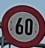

308.5694885253906 95.84491729736328 54.6806640625 54.761985778808594


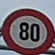

865.9703369140625 127.818603515625 30.8724365234375 33.40315246582031


911.6887817382812 267.6085205078125 93.2362060546875 84.95394897460938


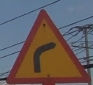

922.360107421875 344.78143310546875 92.3797607421875 82.0489501953125


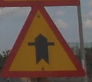

1137.2664794921875 405.96795654296875 7.911865234375 7.63134765625


1189.47412109375 243.33157348632812 56.069580078125 51.900726318359375


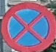

1188.96533203125 300.15728759765625 54.201171875 47.859100341796875


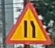

In [10]:
from genericpath import isdir
f = open ('/content/submission.json', "r")
data = json.loads(f.read())
# !rm -rf /content/img
makeafolder('/content/img')

for i in data:
  img = cv2.imread(f"{i['image_id']}")
  x,y,w,h = i['bbox']
  if (x < 0):
     x = 0 
  if (y < 0):
     y = 0 
  crop_img = img[int(y):int(y+h),int(x):int(x+w)]
  print(x,y,w,h)
  st = i['image_id']
  path_save = f'/content/img/{os.path.splitext(ntpath.basename(st))[0]}'
  if (os.path.isdir(path_save) == 0):
    os.mkdir(path_save)
  name = 0 
  for path in os.listdir(path_save):
    if os.path.isfile(os.path.join(path_save, path)):
        name += 1
  cv2_imshow(crop_img)
  cv2.imwrite(path_save + f'/{name}.png',crop_img)
f.close()

#RECOGNITION

/content/drive/MyDrive/CS231_Hoang_Nam_Vy
Namespace(size_mobile=32, size_vgg=32)
32
32
2022-09-26 15:45:13.802015: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
1.png OK!
2.png OK!
3.png OK!


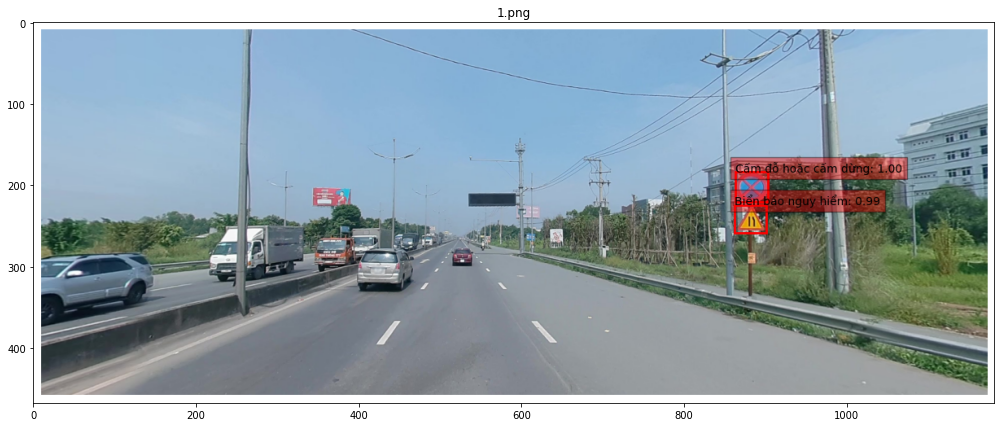

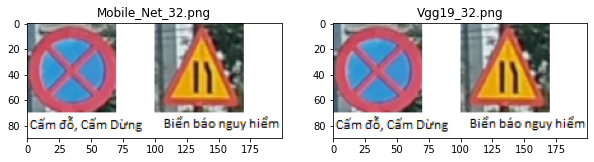

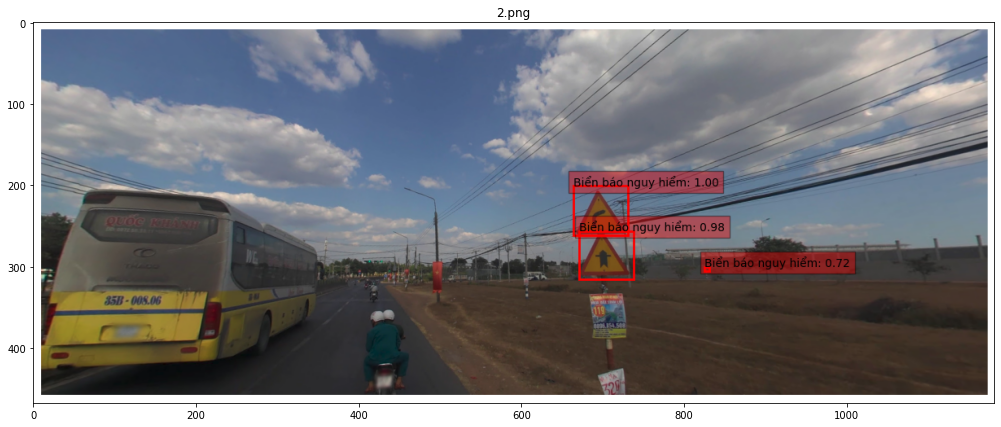

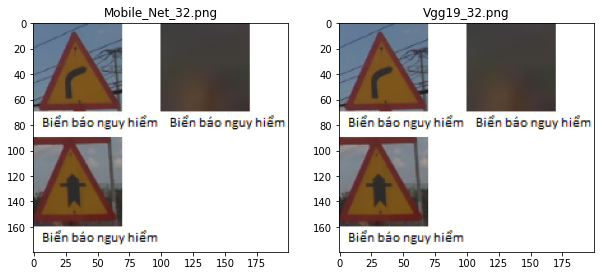

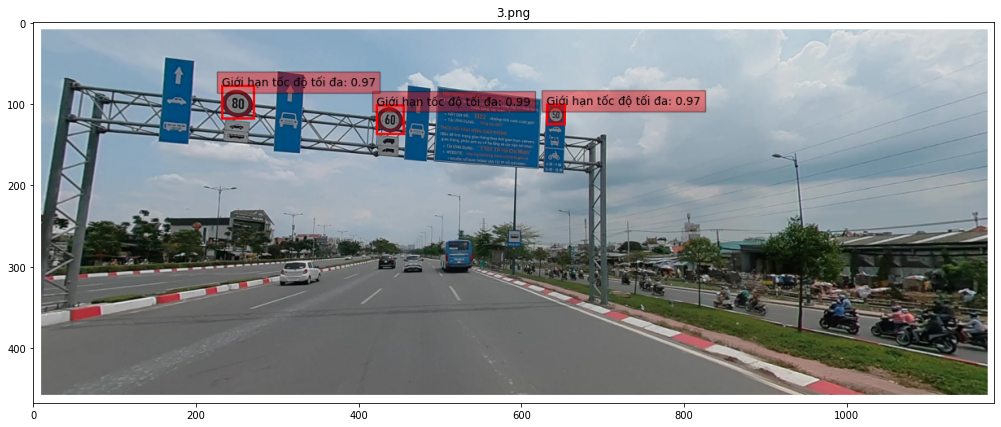

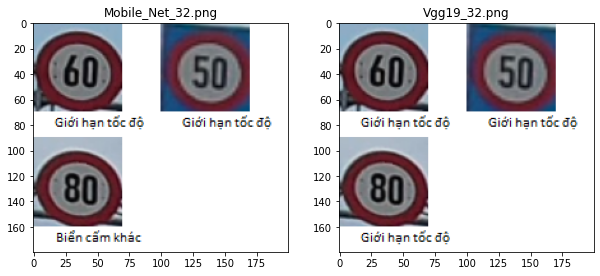

In [11]:
%cd /content/drive/MyDrive/CS231_Hoang_Nam_Vy
!python3 demo.py  --size_vgg 32\
                  --size_mobile 32
from PIL import Image

for res in os.listdir('/content/result'):
  path_dec = f'/content/infernece_images/{res}.png'
  path_res = f'/content/result/{res}'
  infer_img = Image.open(path_dec)
  x = []
  for files in os.listdir(path_res):
    x.append({ 'img' : Image.open(path_res + f'/{files}'), 'name' : files })
  # plt.subplot(1,2,1)
  plt.figure(figsize=(21, 7))
  plt.imshow(infer_img, cmap='gray')
  plt.title(f"{res}.png")
  plt.figure(figsize=(21, 7))
  
  plt.subplot(1,4,3)
  plt.imshow(x[0]['img'], cmap='gray')
  plt.title(x[0]['name'])

  plt.subplot(1,4,4)
  plt.imshow(x[1]['img'], cmap='gray')
  plt.title(x[1]['name'])
  plt.show()